Data Visualization II
1. Use the inbuilt dataset 'titanic' as used in the above problem.Plot a box plot for distribution of age with respect to each gender along with the information about whether they survived or not. (Column names: 'sex' and 'age')
2. Write observations on the inference from the above statistics.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load the Titanic dataset
df = sns.load_dataset("titanic")

# Display the first few rows of the dataset
print(df.head())

# Check for missing values
print(df.isnull().sum())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck      

In [2]:
# Fill missing age values with the mean age
df["age"] = df["age"].fillna(df["age"].mean())
# Fill missing deck values with forward fill
df["deck"] = df["deck"].ffill()
# Drop remaining missing values
df.dropna(inplace=True)

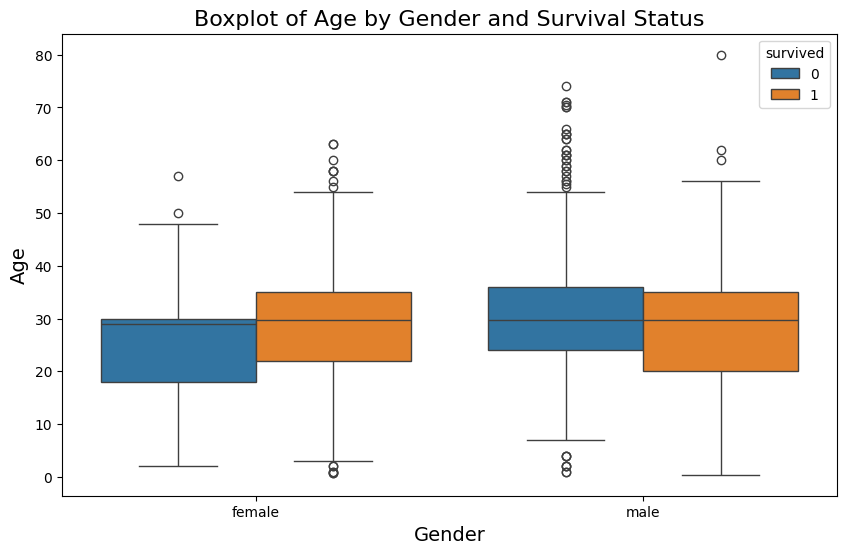

In [4]:
# Boxplot for distribution of age with respect to gender and survival status
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="sex", y="age", hue="survived")
plt.title('Boxplot of Age by Gender and Survival Status', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.show()

In [4]:
# Encode categorical columns using LabelEncoder
encoder = LabelEncoder()
df["sex_enc"] = encoder.fit_transform(df["sex"])
df["embarked_enc"] = encoder.fit_transform(df["embarked"])

In [7]:
df.dtypes

survived           int64
pclass             int64
sex               object
age              float64
sibsp              int64
parch              int64
fare             float64
embarked          object
class           category
who               object
adult_male          bool
deck            category
embark_town       object
alive             object
alone               bool
sex_enc            int64
embarked_enc       int64
dtype: object

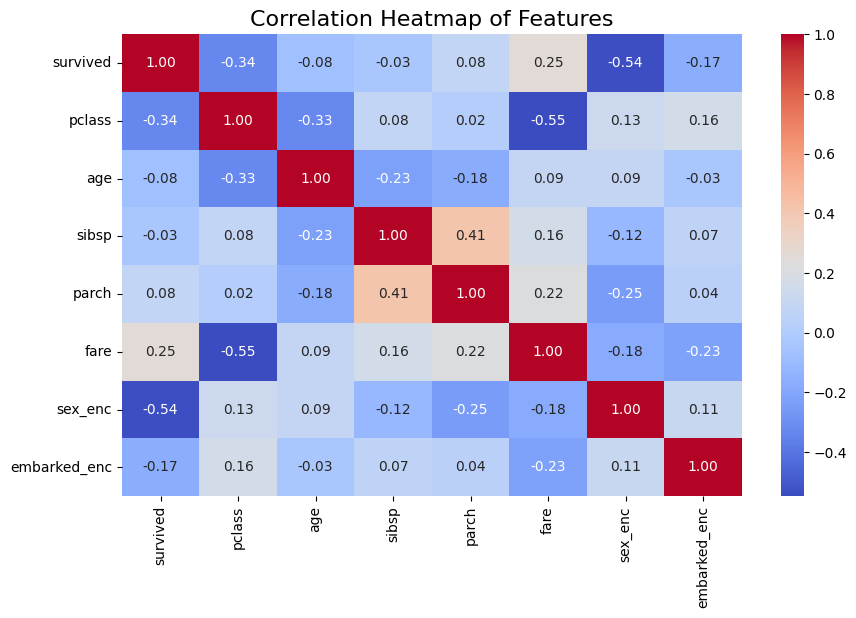

In [8]:
# Correlation heatmap for numerical columns
plt.figure(figsize=(10, 6))
sns.heatmap(df.drop(["alive", "alone", "who", "adult_male", "sex", "class", "deck", "embarked","embark_town"], axis=1).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Features', fontsize=16)
plt.show()

# Observations and Inferences:
- The boxplot shows the age distribution for both genders, split by survival status.
- It is apparent that females had a broader age distribution, whereas males had a more concentrated age range.
- The median age for survivors is slightly higher for females than for males.
- The boxplot also highlights the presence of some outliers, particularly for older passengers who survived.


/tmp/ipykernel_12353/1260443981.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="pclass", y="survived", palette='Set1')


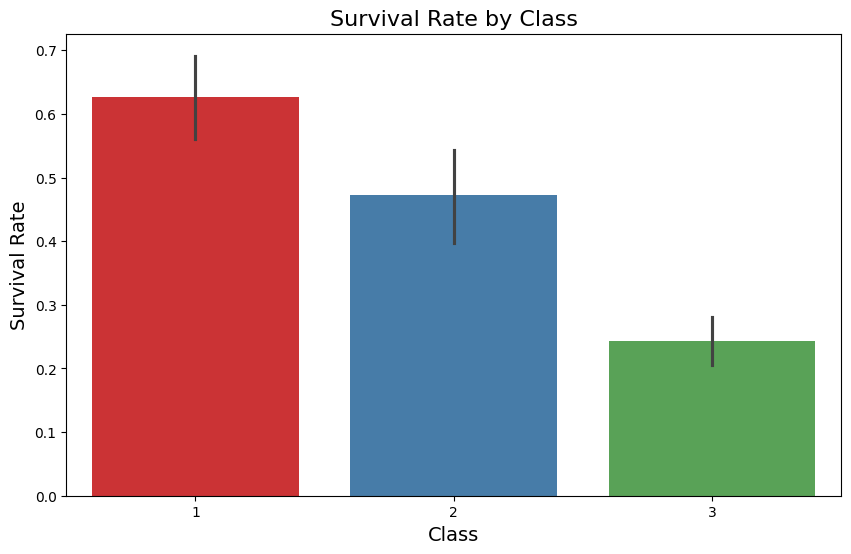

In [9]:
# Additional analysis: Let's create a bar plot for survival rate by passenger class
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="pclass", y="survived", palette='Set1')
plt.title('Survival Rate by Class', fontsize=16)
plt.xlabel('Class', fontsize=14)
plt.ylabel('Survival Rate', fontsize=14)
plt.show()